# instalacja bibliotek

In [2]:

%pip install --quiet boto3
%pip install --quiet python-dotenv

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


# import biblitek oraz plików(2 krotne urachomione)

In [3]:
import pandas as pd
import boto3
import os
import io
from dotenv import load_dotenv
from io import BytesIO

#df = pd.read_csv('halfmarathon_wroclaw_2023__final.csv', sep=';')
#df = pd.read_csv('halfmarathon_wroclaw_2024__final.csv', sep=';')

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt



# konwwersja na sekundy

In [4]:
# Snippet pomocniczy - zmiana czasu na sekundy

def convert_time_to_seconds(time):
    if pd.isnull(time) or time in ['DNS', 'DNF']:
        return None
    time = time.split(':')
    return int(time[0]) * 3600 + int(time[1]) * 60 + int(time[2])

# wykonanie funkcji zmieniajacej na sekundy

In [14]:
df['Czas'] = df['Czas'].apply(convert_time_to_seconds)
df.head()

,Miejsce,Numer startowy,Imię,Nazwisko,Miasto,Kraj,Drużyna,Płeć,Płeć Miejsce,Kategoria wiekowa,...,10 km Tempo,15 km Czas,15 km Miejsce Open,15 km Tempo,20 km Czas,20 km Miejsce Open,20 km Tempo,Tempo Stabilność,Czas,Tempo
0,1.0,596,NIKODEM,DWORCZAK,KOŚCIAN,POL,NaN,M,1.0,M20,...,2.920000,00:45:07,2.0,3.083333,01:00:33,1.0,3.086667,0.007267,3843.0,3.036265
1,2.0,616,MATEUSZ,KACZOR,RADOM,POL,RLTL OPTIMA RADOM,M,2.0,M20,...,2.920000,00:45:07,3.0,3.083333,01:00:38,2.0,3.103333,0.008267,3864.0,3.052856
2,3.0,154,PATRYK,KOZŁOWSKI,RADOM,POL,RLTL-ZTE-RADOM,M,3.0,M20,...,2.920000,00:45:07,1.0,3.083333,01:00:59,3.0,3.173333,0.012467,3880.0,3.065497
3,4.0,591,DARIUSZ,BORATYŃSKI,WROCŁAW,POL,WOSIEK TEAM AZS AWF WROCŁAW,M,4.0,M20,...,3.110000,00:47:48,4.0,3.293333,01:05:40,4.0,3.573333,0.028667,4184.0,3.305681
4,5.0,521,SZYMON,DOROŻYŃSKI,LUBON,POL,SZYMI TEAM AZS POLITECHNIKA OPOLSKA,M,5.0,M30,...,3.153333,00:48:09,5.0,3.453333,01:06:05,5.0,3.586667,0.039800,4205.0,3.322272


# zapis zmienionych plków

In [15]:
#df.to_csv("wyniki_polmaratonu_2023.csv", index=False)
df.to_csv("wyniki_polmaratonu_2024.csv", index=False)

In [5]:
from dotenv import load_dotenv

load_dotenv()


True

# ustalenie lokalnej scieżki

In [26]:
#local_file_path = "wyniki_polmaratonu_2023.csv"
local_file_path = "wyniki_polmaratonu_2024.csv"



In [6]:
import boto3
import os

s3 = boto3.client(
    "s3",
    aws_access_key_id=os.getenv("AWS_ACCESS_KEY_ID"),
    aws_secret_access_key=os.getenv("AWS_SECRET_ACCESS_KEY"),
    # Endpoint jest potrzebny dlatego że używamy chmury innej niż AWS 
    endpoint_url=os.getenv("AWS_ENDPOINT_URL_S3"), 
    # Gdybyśmy używali AWS to musielibyśmy natomiast podać region
    #region_name='eu-central-1'
)

# nazwy bucket i plków w chmurze

In [14]:
BUCKET_NAME = "gotoitrafalmeteo"
REMOTE_FILE_NAME = "wyniki/wyniki_polmaratonu_2023.csv"
#REMOTE_FILE_NAME = "wyniki/wyniki_polmaratonu_2024.csv"

# wysyłanie plków do chmury

In [28]:
s3.upload_file(local_file_path, BUCKET_NAME, REMOTE_FILE_NAME)

print("✅ Plik został zapisany lokalnie i wysłany do DigitalOcean Spaces w folderze 'wyniki'.")

✅ Plik został zapisany lokalnie i wysłany do DigitalOcean Spaces w folderze 'wyniki'.


# nazwa pliku do pobrania

In [15]:
OBJECT_KEY = "wyniki/wyniki_polmaratonu_2023.csv"  # ścieżka w Spaces
#OBJECT_KEY = "wyniki/wyniki_polmaratonu_2024.csv"

#  zapis z chmury do df  2023

In [16]:
# Pobierz plik do pamięci
response = s3.get_object(Bucket=BUCKET_NAME, Key=OBJECT_KEY)

# Wczytaj do DataFrame bez zapisu lokalnego
df_2023 = pd.read_csv(BytesIO(response['Body'].read()))

# Podgląd danych
df_2023.head()

,Miejsce,Numer startowy,Imię,Nazwisko,Miasto,Kraj,Drużyna,Płeć,Płeć Miejsce,Kategoria wiekowa,...,10 km Tempo,15 km Czas,15 km Miejsce Open,15 km Tempo,20 km Czas,20 km Miejsce Open,20 km Tempo,Tempo Stabilność,Czas,Tempo
0,1.0,1787,TOMASZ,GRYCKO,NaN,POL,UKS BLIZA WŁADYSŁAWOWO,M,1.0,M30,...,2.926667,00:44:47,1.0,3.106667,01:01:43,1.0,3.386667,0.031400,3899.0,3.080509
1,2.0,3,ARKADIUSZ,GARDZIELEWSKI,WROCŁAW,POL,ARKADIUSZGARDZIELEWSKI.PL,M,2.0,M30,...,2.983333,00:45:26,2.0,3.143333,01:03:08,2.0,3.540000,0.038000,3983.0,3.146875
2,3.0,3832,KRZYSZTOF,HADAS,POZNAŃ,POL,NaN,M,3.0,M20,...,3.123333,00:47:34,3.0,3.236667,01:05:09,3.0,3.516667,0.024067,4104.0,3.242475
3,4.0,416,DAMIAN,DYDUCH,KĘPNO,POL,AZS POLITECHNIKA OPOLSKA,M,4.0,M30,...,3.196667,00:48:49,5.0,3.330000,01:06:54,4.0,3.616667,0.025467,4216.0,3.330963
4,5.0,8476,KAMIL,MAŃKOWSKI,MIRKÓW,POL,PARKRUN WROCŁAW,M,5.0,M20,...,3.276667,00:49:31,7.0,3.386667,01:07:27,5.0,3.586667,0.023000,4227.0,3.339654


# zapis z chmury do df 2024

In [12]:
# Pobierz plik do pamięci
response = s3.get_object(Bucket=BUCKET_NAME, Key=OBJECT_KEY)

# Wczytaj do DataFrame bez zapisu lokalnego
df_2024 = pd.read_csv(BytesIO(response['Body'].read()))

# Podgląd danych
df_2024.head()

,Miejsce,Numer startowy,Imię,Nazwisko,Miasto,Kraj,Drużyna,Płeć,Płeć Miejsce,Kategoria wiekowa,...,10 km Tempo,15 km Czas,15 km Miejsce Open,15 km Tempo,20 km Czas,20 km Miejsce Open,20 km Tempo,Tempo Stabilność,Czas,Tempo
0,1.0,596,NIKODEM,DWORCZAK,KOŚCIAN,POL,NaN,M,1.0,M20,...,2.920000,00:45:07,2.0,3.083333,01:00:33,1.0,3.086667,0.007267,3843.0,3.036265
1,2.0,616,MATEUSZ,KACZOR,RADOM,POL,RLTL OPTIMA RADOM,M,2.0,M20,...,2.920000,00:45:07,3.0,3.083333,01:00:38,2.0,3.103333,0.008267,3864.0,3.052856
2,3.0,154,PATRYK,KOZŁOWSKI,RADOM,POL,RLTL-ZTE-RADOM,M,3.0,M20,...,2.920000,00:45:07,1.0,3.083333,01:00:59,3.0,3.173333,0.012467,3880.0,3.065497
3,4.0,591,DARIUSZ,BORATYŃSKI,WROCŁAW,POL,WOSIEK TEAM AZS AWF WROCŁAW,M,4.0,M20,...,3.110000,00:47:48,4.0,3.293333,01:05:40,4.0,3.573333,0.028667,4184.0,3.305681
4,5.0,521,SZYMON,DOROŻYŃSKI,LUBON,POL,SZYMI TEAM AZS POLITECHNIKA OPOLSKA,M,5.0,M30,...,3.153333,00:48:09,5.0,3.453333,01:06:05,5.0,3.586667,0.039800,4205.0,3.322272


# łączenie plików df 2023/24

In [17]:
#dodawanie kolumny z rokiem
df_2023['Rok'] = 2023
df_2024['Rok'] = 2024

In [20]:
df_raw = pd.concat([df_2023, df_2024], ignore_index=True)
df_raw.head()

,Miejsce,Numer startowy,Imię,Nazwisko,Miasto,Kraj,Drużyna,Płeć,Płeć Miejsce,Kategoria wiekowa,...,15 km Czas,15 km Miejsce Open,15 km Tempo,20 km Czas,20 km Miejsce Open,20 km Tempo,Tempo Stabilność,Czas,Tempo,Rok
0,1.0,1787,TOMASZ,GRYCKO,NaN,POL,UKS BLIZA WŁADYSŁAWOWO,M,1.0,M30,...,00:44:47,1.0,3.106667,01:01:43,1.0,3.386667,0.031400,3899.0,3.080509,2023
1,2.0,3,ARKADIUSZ,GARDZIELEWSKI,WROCŁAW,POL,ARKADIUSZGARDZIELEWSKI.PL,M,2.0,M30,...,00:45:26,2.0,3.143333,01:03:08,2.0,3.540000,0.038000,3983.0,3.146875,2023
2,3.0,3832,KRZYSZTOF,HADAS,POZNAŃ,POL,NaN,M,3.0,M20,...,00:47:34,3.0,3.236667,01:05:09,3.0,3.516667,0.024067,4104.0,3.242475,2023
3,4.0,416,DAMIAN,DYDUCH,KĘPNO,POL,AZS POLITECHNIKA OPOLSKA,M,4.0,M30,...,00:48:49,5.0,3.330000,01:06:54,4.0,3.616667,0.025467,4216.0,3.330963,2023
4,5.0,8476,KAMIL,MAŃKOWSKI,MIRKÓW,POL,PARKRUN WROCŁAW,M,5.0,M20,...,00:49:31,7.0,3.386667,01:07:27,5.0,3.586667,0.023000,4227.0,3.339654,2023


In [21]:
df_raw.to_csv("linked_wyniki_polmaratonu.csv", index=False)

In [22]:
BUCKET_NAME = "gotoitrafalmeteo"
REMOTE_FILE_NAME = "wyniki/linked_wyniki_polmaratonu_.csv"
local_file_path = "linked_wyniki_polmaratonu.csv"

In [24]:
s3.upload_file(local_file_path, BUCKET_NAME, REMOTE_FILE_NAME)

print("✅ Plik został zapisany lokalnie i wysłany do DigitalOcean Spaces w folderze 'wyniki'.")

✅ Plik został zapisany lokalnie i wysłany do DigitalOcean Spaces w folderze 'wyniki'.


# sprawdzam czy dane mają rozkład zblizony do normalnego

c:\Users\Dom\miniconda3\envs\marathon-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dom\miniconda3\envs\marathon-env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


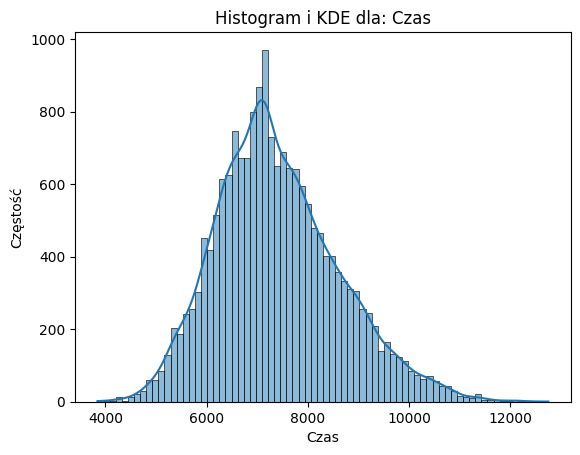

In [25]:
# Zmienna do sprawdzenia
kolumna = "Czas"

sns.histplot(df_raw[kolumna], kde=True)
plt.title(f"Histogram i KDE dla: {kolumna}")
plt.xlabel(kolumna)
plt.ylabel("Częstość")
plt.show()

## zastosowana zostanie normalizacja z-score


## usuwamy outliersy

In [ ]:

df_clean = df_raw.copy()

# === 1. Usuwanie outlierów z kolumny "Czas" metodą IQR ===

Q1 = df_clean["Czas"].quantile(0.25)
Q3 = df_clean["Czas"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtracja
df_clean = df_clean[(df_clean["Czas"] >= lower_bound) & (df_clean["Czas"] <= upper_bound)]

print(f"Liczba wierszy po usunięciu outlierów: {df_clean.shape[0]}")

Liczba wierszy po usunięciu outlierów: 18223


In [29]:
df_raw

,Miejsce,Numer startowy,Imię,Nazwisko,Miasto,Kraj,Drużyna,Płeć,Płeć Miejsce,Kategoria wiekowa,...,15 km Czas,15 km Miejsce Open,15 km Tempo,20 km Czas,20 km Miejsce Open,20 km Tempo,Tempo Stabilność,Czas,Tempo,Rok
0,1.0,1787,TOMASZ,GRYCKO,NaN,POL,UKS BLIZA WŁADYSŁAWOWO,M,1.0,M30,...,00:44:47,1.0,3.106667,01:01:43,1.0,3.386667,0.031400,3899.0,3.080509,2023
1,2.0,3,ARKADIUSZ,GARDZIELEWSKI,WROCŁAW,POL,ARKADIUSZGARDZIELEWSKI.PL,M,2.0,M30,...,00:45:26,2.0,3.143333,01:03:08,2.0,3.540000,0.038000,3983.0,3.146875,2023
2,3.0,3832,KRZYSZTOF,HADAS,POZNAŃ,POL,NaN,M,3.0,M20,...,00:47:34,3.0,3.236667,01:05:09,3.0,3.516667,0.024067,4104.0,3.242475,2023
3,4.0,416,DAMIAN,DYDUCH,KĘPNO,POL,AZS POLITECHNIKA OPOLSKA,M,4.0,M30,...,00:48:49,5.0,3.330000,01:06:54,4.0,3.616667,0.025467,4216.0,3.330963,2023
4,5.0,8476,KAMIL,MAŃKOWSKI,MIRKÓW,POL,PARKRUN WROCŁAW,M,5.0,M20,...,00:49:31,7.0,3.386667,01:07:27,5.0,3.586667,0.023000,4227.0,3.339654,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21952,NaN,6445,ANNA,ŻUROWSKA,NaN,NaN,NaN,K,NaN,K40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024
21953,NaN,23495,JUSTYNA,ŻYGADŁO,NaN,NaN,NaN,K,NaN,K20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024
21954,NaN,9323,DAWID,ŻYTKOWSKI,NaN,NaN,NaN,M,NaN,M20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024
21955,NaN,27386,DOMINIKA,ĆWIERTNIA,NaN,NaN,NaN,K,NaN,K30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024


# normalizacja

In [31]:
from sklearn.preprocessing import StandardScaler

# Inicjalizacja skalera
scaler = StandardScaler()

# Tworzymy kopię DataFrame
df_scaled = df_clean.copy()

# Wybieramy kolumny numeryczne do skalowania (bez kolumny docelowej jeśli chcesz zostawić ją bez zmian)
numeric_cols = df_scaled.select_dtypes(include='number').columns.tolist()
numeric_cols.remove("Czas")  # jeśli nie chcesz skalować celu

# Skalujemy dane
df_scaled[numeric_cols] = scaler.fit_transform(df_scaled[numeric_cols])

print("✅ Dane zostały znormalizowane metodą Z-score.")


✅ Dane zostały znormalizowane metodą Z-score.


In [32]:
df_scaled.to_csv("dane_znormalizowane.csv", index=False)

In [33]:
BUCKET_NAME = "gotoitrafalmeteo"
REMOTE_FILE_NAME = "wyniki/final_wyniki_polmaratonu_.csv"
local_file_path = "dane_znormalizowane.csv"

s3.upload_file(local_file_path, BUCKET_NAME, REMOTE_FILE_NAME)

print("✅ Plik został zapisany lokalnie i wysłany do DigitalOcean Spaces w folderze 'wyniki'.")

✅ Plik został zapisany lokalnie i wysłany do DigitalOcean Spaces w folderze 'wyniki'.
